<a href="https://colab.research.google.com/github/yingzibu/MOL2ADMET/blob/main/examples/Ensemble/MUMUE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
print(torch.__version__)
print('cuda: ', torch.cuda.is_available())

2.1.0+cu121
cuda:  True


In [ ]:
! pip install rdkit --quiet
! pip install PyTDC --quiet
! pip install mycolorpy --quiet
! pip install selfies  --quiet
! pip install pubchempy --quiet
! pip install dgllife --quiet
! pip install molvs --quiet
! pip install dgl -f https://data.dgl.ai/wheels/cu121/repo.html --quiet
! pip install dglgo -f https://data.dgl.ai/wheels-test/repo.html --quiet
! pip install DeepPurpose --quiet
! pip install git+https://github.com/bp-kelley/descriptastorus --quiet
! pip install pandas-flavor --quiet


In [1]:
cd /content/drive/MyDrive/ADMET

/content/drive/MyDrive/ADMET


In [2]:
from scripts.func_utils import make_path, convert_with_qed_sa, get_min, \
                                plot_loss, plot_performance

from scripts.eval_utils import *
from scripts.preprocess_mols import *
from scripts.model_architecture import *
from scripts.dataset import *
from scripts.train import *
import yaml
import pandas as pd
from scripts.get_vocab import *

from tdc.single_pred import ADME
from tdc.single_pred import Tox
from scripts.CONSTANT import *
from scripts.yaml_utils import *
from scripts.TRAIN import *
print('VOCAB TYPE:', VOCAB_TYPE)

VOCAB TYPE: smiles


In [3]:
import pandas as pd
import yaml

def process_ensemble_v2(df:pd.DataFrame,
                        folder_name='A3/uw',
                        model_dict={'MLP':1,
                                    'AttentiveFP':1,
                                    'GIN':1,
                                    'RNN':1}):
    prediction_dict = {}
    task_names = df.columns.tolist()
    task_names.remove('Drug')
    print('task_names:', task_names)

    for model_type, model_num in model_dict.items():
        file_name = f'{folder_name}/{model_type}_MT_{model_num}.yml'
        with open(file_name, 'r') as f: yml_data = yaml.safe_load(f)
        models = PRED(**yml_data['config'])
        models.load_status(yml_data)
        df = models.predict(df['Drug'].tolist(), return_probs=True)
        prediction_dict[model_type] = df
    return prediction_dict


In [4]:
trn, val, tst = collect_data(names_A3)
trn_dict = process_ensemble_v2(trn)
val_dict = process_ensemble_v2(val)
tst_dict = process_ensemble_v2(tst)

Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!
Found local copy...
Loading...
Done!


collect data for:  ['PAMPA_NCATS', 'Lipophilicity_AstraZeneca', 'Solubility_AqSolDB']
task_names: ['PAMPA_NCATS', 'Lipophilicity_AstraZeneca', 'Solubility_AqSolDB']
Model type:  MLP | Model parameters:  32419
finish load data status 

load pretrained model from  A3/uw/MLP_MT_1.pt
--> preparing data loader for model type  MLP
---> converting SMILES to MACCS...
---> FINISHED


Predicting...: 100%|██████████| 176/176 [00:02<00:00, 87.46it/s]


Model type:  AttentiveFP | Model parameters:  3824109
finish load data status 

load pretrained model from  A3/uw/AttentiveFP_MT_1.pt
--> preparing data loader for model type  AttentiveFP
Processing dgl graphs from scratch...


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  45 tasks      | elapsed:    4.3s
[Parallel(n_jobs=6)]: Done 3340 tasks      | elapsed:    8.1s
[Parallel(n_jobs=6)]: Done 11061 tasks      | elapsed:   14.6s
[Parallel(n_jobs=6)]: Done 11245 out of 11245 | elapsed:   14.8s finished
Predicting...: 100%|██████████| 176/176 [00:06<00:00, 25.47it/s]


gin_supervised_contextpred_pre_trained.pth: 100%|██████████| 7.45M/7.45M [00:00<00:00, 38.2MB/s]


Pretrained model loaded
Model type:  GIN | Model parameters:  1978767
finish load data status 

load pretrained model from  A3/uw/GIN_MT_1.pt
--> preparing data loader for model type  GIN


Predicting...: 100%|██████████| 176/176 [00:25<00:00,  6.85it/s]


Model type:  RNN | Model parameters:  2980999
finish load data status 

load pretrained model from  A3/uw/RNN_MT_1.pt
--> preparing data loader for model type  RNN


Predicting...: 100%|██████████| 176/176 [00:04<00:00, 37.51it/s]


task_names: ['PAMPA_NCATS', 'Lipophilicity_AstraZeneca', 'Solubility_AqSolDB']
Model type:  MLP | Model parameters:  32419
finish load data status 

load pretrained model from  A3/uw/MLP_MT_1.pt
--> preparing data loader for model type  MLP
---> converting SMILES to MACCS...
---> FINISHED


Predicting...: 100%|██████████| 26/26 [00:00<00:00, 86.81it/s]
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


Model type:  AttentiveFP | Model parameters:  3824109
finish load data status 

load pretrained model from  A3/uw/AttentiveFP_MT_1.pt
--> preparing data loader for model type  AttentiveFP
Processing dgl graphs from scratch...


[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 1617 out of 1617 | elapsed:    1.5s finished
Predicting...: 100%|██████████| 26/26 [00:00<00:00, 54.20it/s]


gin_supervised_contextpred_pre_trained.pth: 100%|██████████| 7.45M/7.45M [00:00<00:00, 37.4MB/s]


Pretrained model loaded
Model type:  GIN | Model parameters:  1978767
finish load data status 

load pretrained model from  A3/uw/GIN_MT_1.pt
--> preparing data loader for model type  GIN


Predicting...: 100%|██████████| 26/26 [00:03<00:00,  6.83it/s]


Model type:  RNN | Model parameters:  2980999
finish load data status 

load pretrained model from  A3/uw/RNN_MT_1.pt
--> preparing data loader for model type  RNN


Predicting...: 100%|██████████| 26/26 [00:00<00:00, 28.69it/s]


task_names: ['PAMPA_NCATS', 'Lipophilicity_AstraZeneca', 'Solubility_AqSolDB']
Model type:  MLP | Model parameters:  32419
finish load data status 

load pretrained model from  A3/uw/MLP_MT_1.pt
--> preparing data loader for model type  MLP
---> converting SMILES to MACCS...
---> FINISHED


Predicting...: 100%|██████████| 51/51 [00:00<00:00, 80.13it/s]
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


Model type:  AttentiveFP | Model parameters:  3824109
finish load data status 

load pretrained model from  A3/uw/AttentiveFP_MT_1.pt
--> preparing data loader for model type  AttentiveFP
Processing dgl graphs from scratch...


[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 3148 tasks      | elapsed:    2.8s
[Parallel(n_jobs=6)]: Done 3238 out of 3238 | elapsed:    2.9s finished
Predicting...: 100%|██████████| 51/51 [00:00<00:00, 54.26it/s]


gin_supervised_contextpred_pre_trained.pth: 100%|██████████| 7.45M/7.45M [00:00<00:00, 39.0MB/s]


Pretrained model loaded
Model type:  GIN | Model parameters:  1978767
finish load data status 

load pretrained model from  A3/uw/GIN_MT_1.pt
--> preparing data loader for model type  GIN


Predicting...: 100%|██████████| 51/51 [00:07<00:00,  6.95it/s]


Model type:  RNN | Model parameters:  2980999
finish load data status 

load pretrained model from  A3/uw/RNN_MT_1.pt
--> preparing data loader for model type  RNN


Predicting...: 100%|██████████| 51/51 [00:01<00:00, 30.72it/s]


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

class mue_dataset(Dataset):
    def __init__(self, df, prediction_dict, prop_names, mask=MASK):
        super(mue_dataset, self).__init__()
        if isinstance(prop_names, str): prop_names = [prop_names]
        self.pred_MLP = prediction_dict['MLP'][prop_names]
        self.pred_ATP = prediction_dict['AttentiveFP'][prop_names]
        self.pred_GIN = prediction_dict['GIN'][prop_names]
        self.pred_RNN = prediction_dict['RNN'][prop_names]

        # Stack predictions from seperate models
        self.pred_STK = np.stack((self.pred_MLP, self.pred_ATP,
                                  self.pred_GIN, self.pred_RNN), axis=-1)
        self.len = len(df)
        self.df = df.fillna(mask)
        self.props = self.df[prop_names]
        self.prop_names = prop_names


    def get_stack(self): return self.pred_STK

    def __getitem__(self, idx):
        fp = torch.tensor(self.pred_STK[idx], dtype=torch.float32)
        label = torch.tensor(self.props.iloc[idx], dtype=torch.float32)
        return fp, label

    def __len__(self): return self.len

In [6]:
trn_d = mue_dataset(trn, trn_dict, names_A3)
val_d = mue_dataset(val, val_dict, names_A3)
tst_d = mue_dataset(tst, tst_dict, names_A3)

batch_size = 64

prms = {'batch_size': batch_size, 'shuffle':True,
        'drop_last': False, 'num_workers': 0}
pr_t = {'batch_size': batch_size, 'shuffle':False,
        'drop_last': False, 'num_workers': 0}
trn_l = DataLoader(trn_d, **prms)
val_l = DataLoader(val_d, **prms)
tst_l = DataLoader(tst_d, **pr_t)

In [24]:
config = get_config('MUE', names_A3)
config['lr'] = 1e-5
config['uncertainty_weight'] = False
config['verbose_freq'] = 5
config

{'model_type': 'MUE',
 'in_dim': 4,
 'out_dim': 1,
 'hid_dims': [128, 64, 32, 16],
 'dropout': 0.1,
 'prop_names': ['PAMPA_NCATS',
  'Lipophilicity_AstraZeneca',
  'Solubility_AqSolDB'],
 'IS_R': [False, True, True],
 'batch_size': 128,
 'lr': 1e-05,
 'wd': 1e-05,
 'patience': 30,
 'verbose_freq': 5,
 'model_path': 'ckpt_MUE.pt',
 'scale_dict': None,
 'config_path': 'ckpt_MUE.yml',
 'weight_loss': [0.3333333333333333, 0.3333333333333333, 0.3333333333333333],
 'MAX_EPOCH': 1000,
 'uncertainty_weight': False}

In [27]:
models = PRED(**config)
# models.model = m.to('cuda')

Model type:  MUE | Model parameters:  11521


Start training MUE...
Epoch:0 [Train] Loss: 6.969 | [Valid] Loss: 7.208	SAVE MODEL: loss: inf -> 7.208 | runtime: 0.152 ms
Epoch:1 [Train] Loss: 6.774 | [Valid] Loss: 6.964	SAVE MODEL: loss: 7.208 -> 6.964 | runtime: 0.150 ms
Epoch:2 [Train] Loss: 6.500 | [Valid] Loss: 6.699	SAVE MODEL: loss: 6.964 -> 6.699 | runtime: 0.157 ms
Epoch:3 [Train] Loss: 6.165 | [Valid] Loss: 6.138	SAVE MODEL: loss: 6.699 -> 6.138 | runtime: 0.152 ms
Epoch:4 [Train] Loss: 5.719 | [Valid] Loss: 5.759	SAVE MODEL: loss: 6.138 -> 5.759 | runtime: 0.150 ms
Epoch:5 [Train] Loss: 5.179 | [Valid] Loss: 5.049	SAVE MODEL: loss: 5.759 -> 5.049 | runtime: 0.163 ms
Train time: 0.154+/-0.005 ms


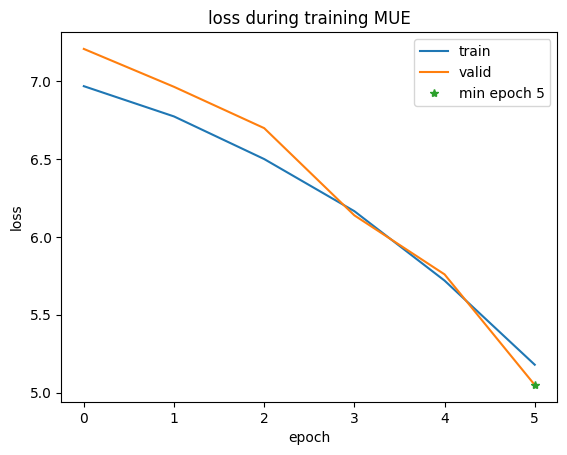

*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.837  &0.500  &0.837  &1.000  &0.000  &0.912 &0.799 &  nan &0.940

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&1.560  &3.144  &1.773  &-1.187

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&2.804  &11.618  &3.409  &-1.189

Epoch:6 [Train] Loss: 4.561 | [Valid] Loss: 4.419	SAVE MODEL: loss: 5.049 -> 4.419 | runtime: 0.151 ms
Epoch:7 [Train] Loss: 3.891 | [Valid] Loss: 3.723	SAVE MODEL: loss: 4.419 -> 3.723 | runtime: 0.151 ms
Epoch:8 [Train] Loss: 3.214 | [Valid] Loss: 2.985	SAVE MODEL: loss: 3.723 -> 2.985 | runtime: 0.160 ms
Epoch:9 [Train] Loss: 2.547 | [Valid] Loss: 2.385	SAVE MODEL: loss: 2.985 -> 2.385 | runtime: 0.152 ms
Epoch:10 [Train] Loss: 1.947 | [Valid] Loss: 1.755	SAVE MODEL: loss: 2.385 -> 1.755 | runtime: 0.153 ms
Train time: 0.154+/-0.004 ms


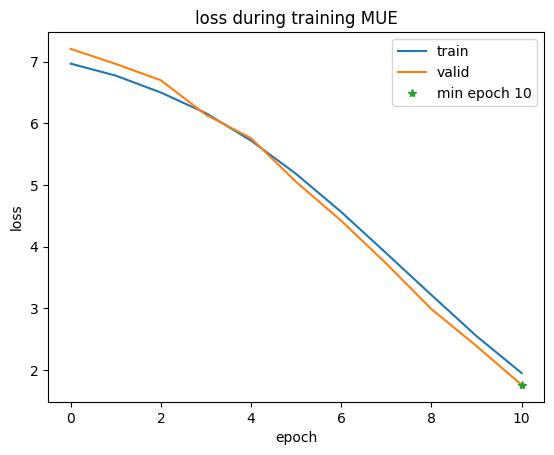

*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.837  &0.500  &0.837  &1.000  &0.000  &0.912 &0.801 &  nan &0.941

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.599  &0.525  &0.724  &0.635

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&1.659  &4.360  &2.088  &0.178

Epoch:11 [Train] Loss: 1.495 | [Valid] Loss: 1.302	SAVE MODEL: loss: 1.755 -> 1.302 | runtime: 0.153 ms
Epoch:12 [Train] Loss: 1.077 | [Valid] Loss: 0.971	SAVE MODEL: loss: 1.302 -> 0.971 | runtime: 0.154 ms
Epoch:13 [Train] Loss: 0.847 | [Valid] Loss: 0.790	SAVE MODEL: loss: 0.971 -> 0.790 | runtime: 0.152 ms
Epoch:14 [Train] Loss: 0.705 | [Valid] Loss: 0.672	SAVE MODEL: loss: 0.790 -> 0.672 | runtime: 0.155 ms
Epoch:15 [Train] Loss: 0.643 | [Valid] Loss: 0.637	SAVE MODEL: loss: 0.672 -> 0.637 | runtime: 0.150 ms
Train time: 0.154+/-0.004 ms


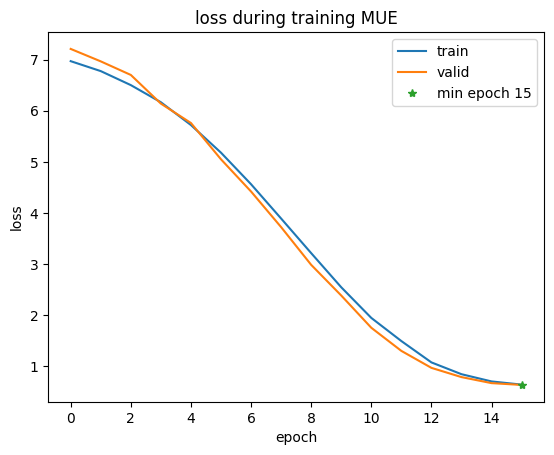

*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.837  &0.500  &0.837  &1.000  &0.000  &0.912 &0.803 &  nan &0.942

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.482  &0.371  &0.609  &0.742

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.733  &1.093  &1.045  &0.794

Epoch:16 [Train] Loss: 0.613 | [Valid] Loss: 0.623	SAVE MODEL: loss: 0.637 -> 0.623 | runtime: 0.153 ms
Epoch:17 [Train] Loss: 0.593 | [Valid] Loss: 0.611	SAVE MODEL: loss: 0.623 -> 0.611 | runtime: 0.151 ms
Epoch:18 [Train] Loss: 0.602 | [Valid] Loss: 0.608	SAVE MODEL: loss: 0.611 -> 0.608 | runtime: 0.151 ms
Epoch:19 [Train] Loss: 0.593 | [Valid] Loss: 0.605	SAVE MODEL: loss: 0.608 -> 0.605 | runtime: 0.150 ms
Epoch:20 [Train] Loss: 0.601 | [Valid] Loss: 0.601	SAVE MODEL: loss: 0.605 -> 0.601 | runtime: 0.156 ms
Train time: 0.153+/-0.003 ms


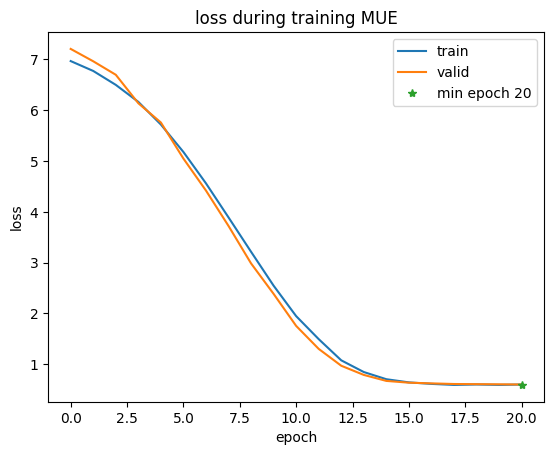

*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.837  &0.500  &0.837  &1.000  &0.000  &0.912 &0.804 &  nan &0.943

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.475  &0.365  &0.604  &0.746

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.691  &1.006  &1.003  &0.810

Epoch:21 [Train] Loss: 0.613 | [Valid] Loss: 0.607	EarlyStopping counter: 1 out of 30
Epoch:22 [Train] Loss: 0.591 | [Valid] Loss: 0.599	SAVE MODEL: loss: 0.601 -> 0.599 | runtime: 0.153 ms
Epoch:23 [Train] Loss: 0.572 | [Valid] Loss: 0.609	EarlyStopping counter: 1 out of 30
Epoch:24 [Train] Loss: 0.593 | [Valid] Loss: 0.591	SAVE MODEL: loss: 0.599 -> 0.591 | runtime: 0.151 ms
Epoch:25 [Train] Loss: 0.582 | [Valid] Loss: 0.594	EarlyStopping counter: 1 out of 30
Train time: 0.153+/-0.003 ms


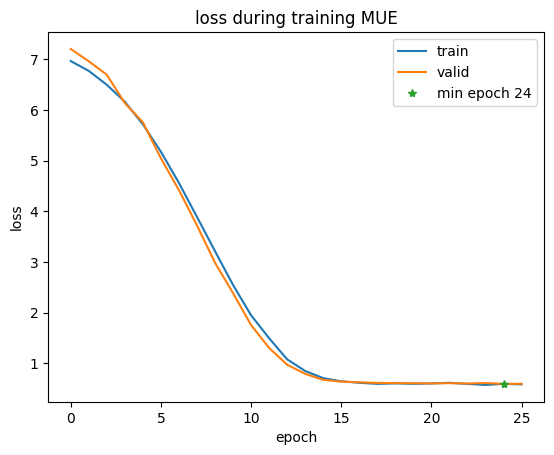

*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.837  &0.500  &0.837  &1.000  &0.000  &0.912 &0.807 &  nan &0.945

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.476  &0.365  &0.604  &0.746

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.683  &0.995  &0.997  &0.813

Epoch:26 [Train] Loss: 0.593 | [Valid] Loss: 0.612	EarlyStopping counter: 2 out of 30
Epoch:27 [Train] Loss: 0.574 | [Valid] Loss: 0.600	EarlyStopping counter: 3 out of 30
Epoch:28 [Train] Loss: 0.577 | [Valid] Loss: 0.616	EarlyStopping counter: 4 out of 30
Epoch:29 [Train] Loss: 0.585 | [Valid] Loss: 0.595	EarlyStopping counter: 5 out of 30
Epoch:30 [Train] Loss: 0.576 | [Valid] Loss: 0.604	EarlyStopping counter: 6 out of 30
Train time: 0.153+/-0.003 ms


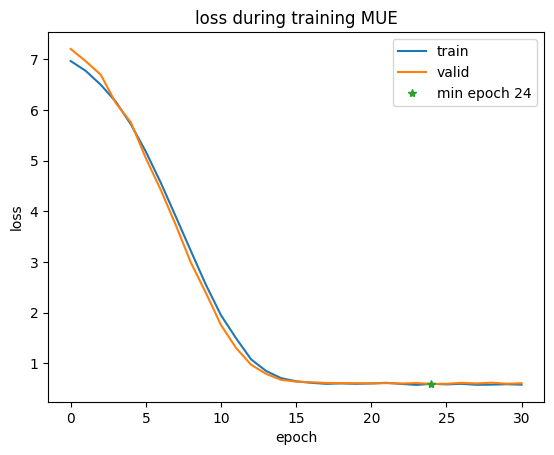

*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.837  &0.500  &0.837  &1.000  &0.000  &0.912 &0.808 &  nan &0.946

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.475  &0.364  &0.603  &0.747

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.680  &0.989  &0.994  &0.814

Epoch:31 [Train] Loss: 0.564 | [Valid] Loss: 0.600	EarlyStopping counter: 7 out of 30
Epoch:32 [Train] Loss: 0.563 | [Valid] Loss: 0.609	EarlyStopping counter: 8 out of 30
Epoch:33 [Train] Loss: 0.575 | [Valid] Loss: 0.605	EarlyStopping counter: 9 out of 30
Epoch:34 [Train] Loss: 0.554 | [Valid] Loss: 0.590	SAVE MODEL: loss: 0.591 -> 0.590 | runtime: 0.151 ms
Epoch:35 [Train] Loss: 0.551 | [Valid] Loss: 0.602	EarlyStopping counter: 1 out of 30
Train time: 0.154+/-0.003 ms


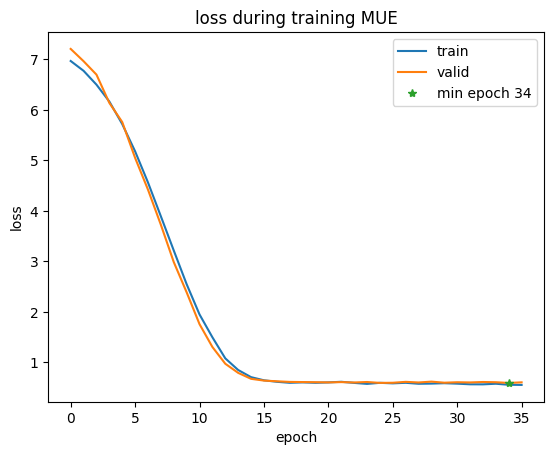

*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.837  &0.500  &0.837  &1.000  &0.000  &0.912 &0.809 &  nan &0.946

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.469  &0.359  &0.599  &0.750

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.678  &0.990  &0.995  &0.813

Epoch:36 [Train] Loss: 0.557 | [Valid] Loss: 0.604	EarlyStopping counter: 2 out of 30
Epoch:37 [Train] Loss: 0.566 | [Valid] Loss: 0.586	SAVE MODEL: loss: 0.590 -> 0.586 | runtime: 0.155 ms
Epoch:38 [Train] Loss: 0.581 | [Valid] Loss: 0.587	EarlyStopping counter: 1 out of 30
Epoch:39 [Train] Loss: 0.547 | [Valid] Loss: 0.595	EarlyStopping counter: 2 out of 30
Epoch:40 [Train] Loss: 0.541 | [Valid] Loss: 0.606	EarlyStopping counter: 3 out of 30
Train time: 0.154+/-0.003 ms


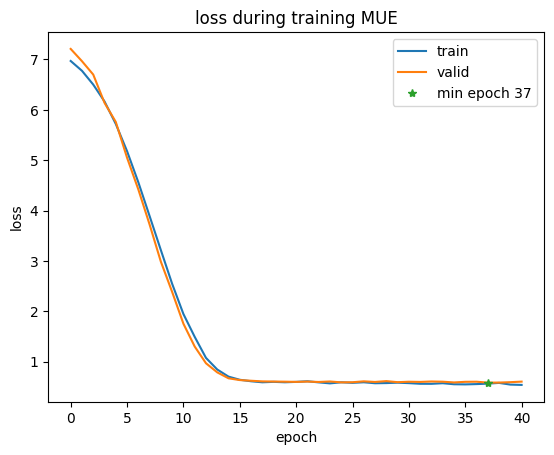

*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.837  &0.500  &0.837  &1.000  &0.000  &0.912 &0.810 &  nan &0.947

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.465  &0.356  &0.597  &0.752

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.678  &0.992  &0.996  &0.813

Epoch:41 [Train] Loss: 0.574 | [Valid] Loss: 0.600	EarlyStopping counter: 4 out of 30
Epoch:42 [Train] Loss: 0.542 | [Valid] Loss: 0.583	SAVE MODEL: loss: 0.586 -> 0.583 | runtime: 0.153 ms
Epoch:43 [Train] Loss: 0.547 | [Valid] Loss: 0.584	EarlyStopping counter: 1 out of 30
Epoch:44 [Train] Loss: 0.550 | [Valid] Loss: 0.600	EarlyStopping counter: 2 out of 30
Epoch:45 [Train] Loss: 0.545 | [Valid] Loss: 0.618	EarlyStopping counter: 3 out of 30
Train time: 0.154+/-0.003 ms


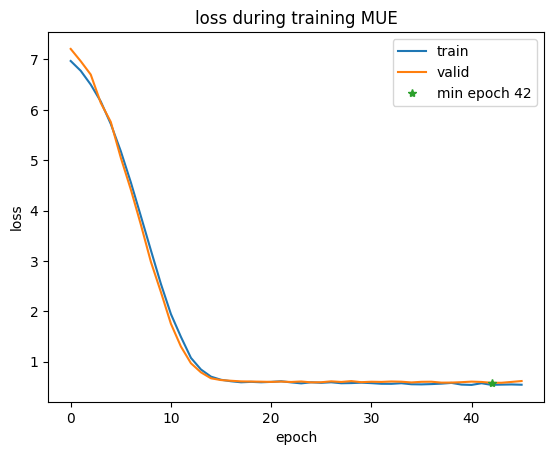

*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.837  &0.500  &0.837  &1.000  &0.000  &0.912 &0.813 &  nan &0.948

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.464  &0.355  &0.595  &0.753

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.678  &0.994  &0.997  &0.813

Epoch:46 [Train] Loss: 0.547 | [Valid] Loss: 0.594	EarlyStopping counter: 4 out of 30
Epoch:47 [Train] Loss: 0.548 | [Valid] Loss: 0.592	EarlyStopping counter: 5 out of 30
Epoch:48 [Train] Loss: 0.543 | [Valid] Loss: 0.606	EarlyStopping counter: 6 out of 30
Epoch:49 [Train] Loss: 0.543 | [Valid] Loss: 0.608	EarlyStopping counter: 7 out of 30
Epoch:50 [Train] Loss: 0.529 | [Valid] Loss: 0.587	EarlyStopping counter: 8 out of 30
Train time: 0.154+/-0.003 ms


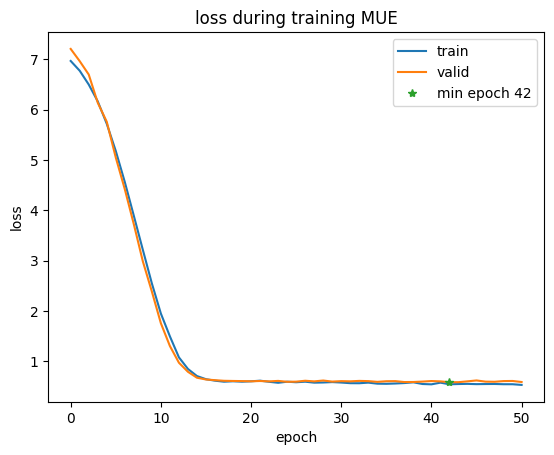

*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.837  &0.500  &0.837  &1.000  &0.000  &0.912 &0.813 &  nan &0.948

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.462  &0.352  &0.593  &0.755

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.679  &0.999  &0.999  &0.812

Epoch:51 [Train] Loss: 0.531 | [Valid] Loss: 0.637	EarlyStopping counter: 9 out of 30
Epoch:52 [Train] Loss: 0.534 | [Valid] Loss: 0.598	EarlyStopping counter: 10 out of 30
Epoch:53 [Train] Loss: 0.528 | [Valid] Loss: 0.588	EarlyStopping counter: 11 out of 30
Epoch:54 [Train] Loss: 0.540 | [Valid] Loss: 0.605	EarlyStopping counter: 12 out of 30
Epoch:55 [Train] Loss: 0.526 | [Valid] Loss: 0.590	EarlyStopping counter: 13 out of 30
Train time: 0.154+/-0.003 ms


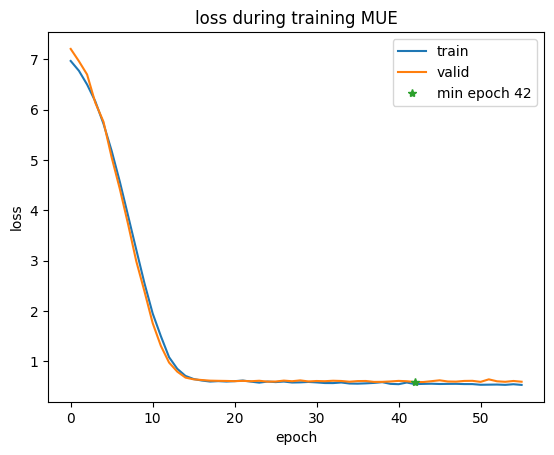

*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.837  &0.500  &0.837  &1.000  &0.000  &0.912 &0.815 &  nan &0.949

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.460  &0.350  &0.592  &0.756

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.679  &1.000  &1.000  &0.812

Epoch:56 [Train] Loss: 0.529 | [Valid] Loss: 0.588	EarlyStopping counter: 14 out of 30
Epoch:57 [Train] Loss: 0.530 | [Valid] Loss: 0.596	EarlyStopping counter: 15 out of 30
Epoch:58 [Train] Loss: 0.521 | [Valid] Loss: 0.597	EarlyStopping counter: 16 out of 30
Epoch:59 [Train] Loss: 0.521 | [Valid] Loss: 0.602	EarlyStopping counter: 17 out of 30
Epoch:60 [Train] Loss: 0.533 | [Valid] Loss: 0.584	EarlyStopping counter: 18 out of 30
Train time: 0.154+/-0.003 ms


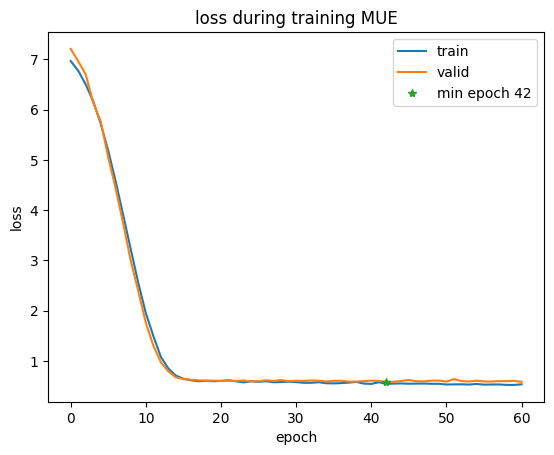

*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.837  &0.500  &0.837  &1.000  &0.000  &0.912 &0.815 &  nan &0.949

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.458  &0.349  &0.591  &0.757

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.678  &0.998  &0.999  &0.812

Epoch:61 [Train] Loss: 0.522 | [Valid] Loss: 0.612	EarlyStopping counter: 19 out of 30
Epoch:62 [Train] Loss: 0.525 | [Valid] Loss: 0.600	EarlyStopping counter: 20 out of 30
Epoch:63 [Train] Loss: 0.533 | [Valid] Loss: 0.590	EarlyStopping counter: 21 out of 30
Epoch:64 [Train] Loss: 0.536 | [Valid] Loss: 0.589	EarlyStopping counter: 22 out of 30
Epoch:65 [Train] Loss: 0.530 | [Valid] Loss: 0.598	EarlyStopping counter: 23 out of 30
Train time: 0.154+/-0.003 ms


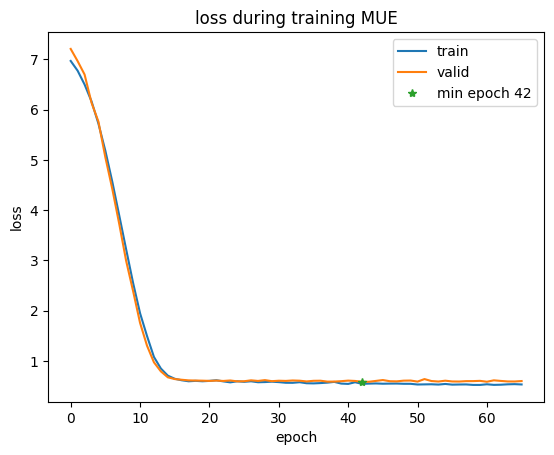

*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.837  &0.500  &0.837  &1.000  &0.000  &0.912 &0.816 &  nan &0.949

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.455  &0.347  &0.589  &0.759

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.678  &1.000  &1.000  &0.812

Epoch:66 [Train] Loss: 0.529 | [Valid] Loss: 0.607	EarlyStopping counter: 24 out of 30
Epoch:67 [Train] Loss: 0.516 | [Valid] Loss: 0.594	EarlyStopping counter: 25 out of 30
Epoch:68 [Train] Loss: 0.525 | [Valid] Loss: 0.590	EarlyStopping counter: 26 out of 30
Epoch:69 [Train] Loss: 0.520 | [Valid] Loss: 0.583	SAVE MODEL: loss: 0.583 -> 0.583 | runtime: 0.151 ms
Epoch:70 [Train] Loss: 0.534 | [Valid] Loss: 0.592	EarlyStopping counter: 1 out of 30
Train time: 0.154+/-0.003 ms


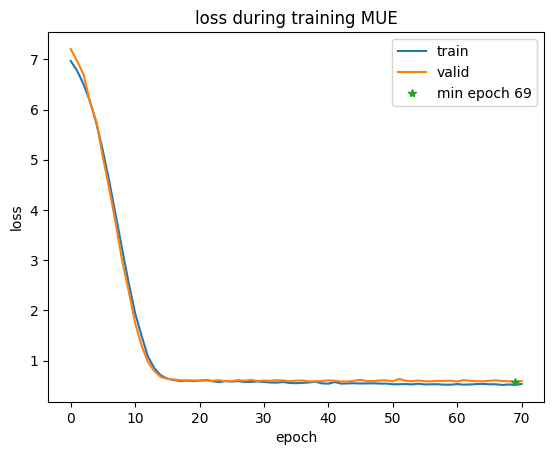

*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.837  &0.500  &0.837  &1.000  &0.000  &0.912 &0.813 &  nan &0.948

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.454  &0.345  &0.588  &0.760

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.679  &1.000  &1.000  &0.811

Epoch:71 [Train] Loss: 0.510 | [Valid] Loss: 0.589	EarlyStopping counter: 2 out of 30
Epoch:72 [Train] Loss: 0.525 | [Valid] Loss: 0.591	EarlyStopping counter: 3 out of 30
Epoch:73 [Train] Loss: 0.529 | [Valid] Loss: 0.594	EarlyStopping counter: 4 out of 30
Epoch:74 [Train] Loss: 0.520 | [Valid] Loss: 0.611	EarlyStopping counter: 5 out of 30
Epoch:75 [Train] Loss: 0.521 | [Valid] Loss: 0.586	EarlyStopping counter: 6 out of 30
Train time: 0.154+/-0.003 ms


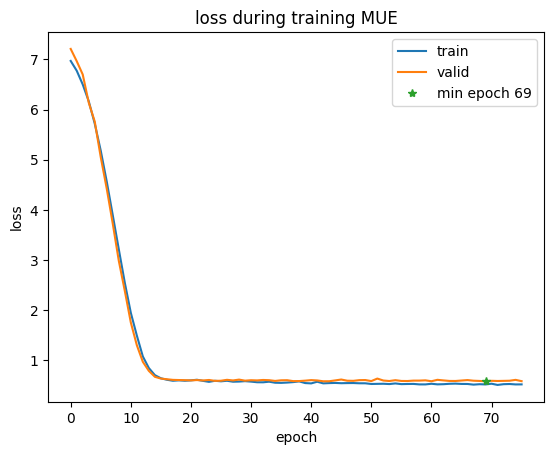

*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.837  &0.500  &0.837  &1.000  &0.000  &0.912 &0.815 &  nan &0.949

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.458  &0.347  &0.589  &0.758

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.679  &1.003  &1.001  &0.811

Epoch:76 [Train] Loss: 0.520 | [Valid] Loss: 0.595	EarlyStopping counter: 7 out of 30
Epoch:77 [Train] Loss: 0.513 | [Valid] Loss: 0.589	EarlyStopping counter: 8 out of 30
Epoch:78 [Train] Loss: 0.528 | [Valid] Loss: 0.578	SAVE MODEL: loss: 0.583 -> 0.578 | runtime: 0.151 ms
Epoch:79 [Train] Loss: 0.514 | [Valid] Loss: 0.595	EarlyStopping counter: 1 out of 30
Epoch:80 [Train] Loss: 0.526 | [Valid] Loss: 0.588	EarlyStopping counter: 2 out of 30
Train time: 0.154+/-0.003 ms


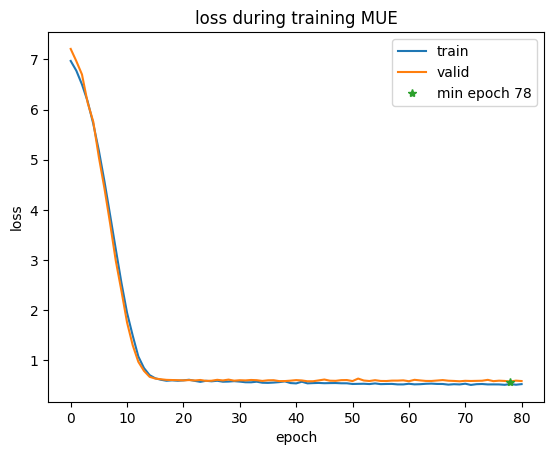

*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.837  &0.500  &0.837  &1.000  &0.000  &0.912 &0.814 &  nan &0.949

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.457  &0.346  &0.588  &0.759

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.680  &1.003  &1.002  &0.811

Epoch:81 [Train] Loss: 0.518 | [Valid] Loss: 0.605	EarlyStopping counter: 3 out of 30
Epoch:82 [Train] Loss: 0.520 | [Valid] Loss: 0.593	EarlyStopping counter: 4 out of 30
Epoch:83 [Train] Loss: 0.506 | [Valid] Loss: 0.593	EarlyStopping counter: 5 out of 30
Epoch:84 [Train] Loss: 0.525 | [Valid] Loss: 0.595	EarlyStopping counter: 6 out of 30
Epoch:85 [Train] Loss: 0.532 | [Valid] Loss: 0.597	EarlyStopping counter: 7 out of 30
Train time: 0.154+/-0.003 ms


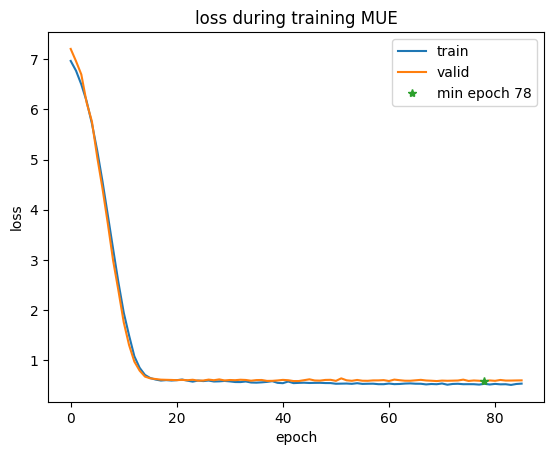

*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.837  &0.500  &0.837  &1.000  &0.000  &0.912 &0.814 &  nan &0.949

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.454  &0.345  &0.588  &0.760

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.681  &1.007  &1.003  &0.810

Epoch:86 [Train] Loss: 0.521 | [Valid] Loss: 0.599	EarlyStopping counter: 8 out of 30
Epoch:87 [Train] Loss: 0.513 | [Valid] Loss: 0.592	EarlyStopping counter: 9 out of 30
Epoch:88 [Train] Loss: 0.520 | [Valid] Loss: 0.591	EarlyStopping counter: 10 out of 30
Epoch:89 [Train] Loss: 0.520 | [Valid] Loss: 0.590	EarlyStopping counter: 11 out of 30
Epoch:90 [Train] Loss: 0.515 | [Valid] Loss: 0.608	EarlyStopping counter: 12 out of 30
Train time: 0.154+/-0.003 ms


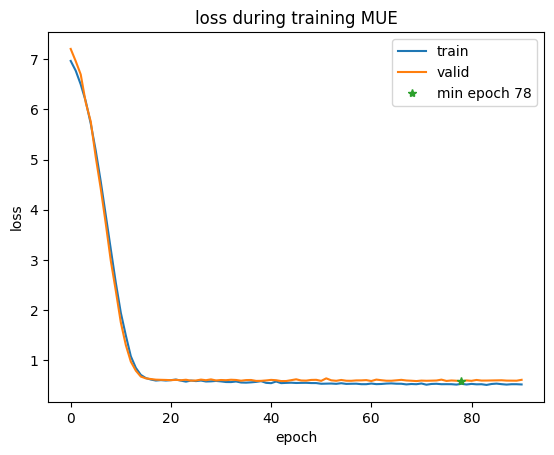

*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.837  &0.500  &0.837  &1.000  &0.000  &0.912 &0.816 &  nan &0.950

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.459  &0.348  &0.590  &0.758

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.680  &1.006  &1.003  &0.810

Epoch:91 [Train] Loss: 0.510 | [Valid] Loss: 0.592	EarlyStopping counter: 13 out of 30
Epoch:92 [Train] Loss: 0.521 | [Valid] Loss: 0.609	EarlyStopping counter: 14 out of 30
Epoch:93 [Train] Loss: 0.507 | [Valid] Loss: 0.598	EarlyStopping counter: 15 out of 30
Epoch:94 [Train] Loss: 0.512 | [Valid] Loss: 0.595	EarlyStopping counter: 16 out of 30
Epoch:95 [Train] Loss: 0.505 | [Valid] Loss: 0.592	EarlyStopping counter: 17 out of 30
Train time: 0.154+/-0.003 ms


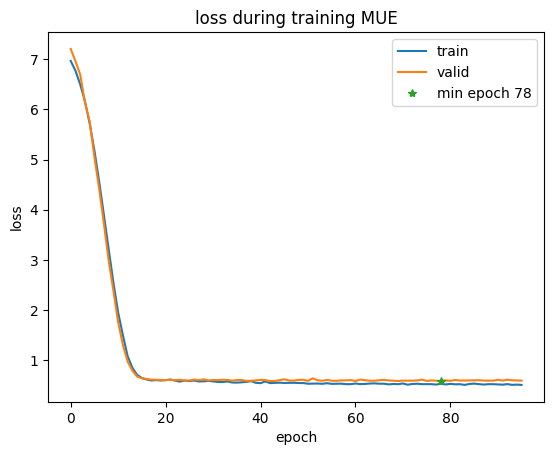

*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.837  &0.500  &0.837  &1.000  &0.000  &0.912 &0.813 &  nan &0.949

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.456  &0.346  &0.589  &0.759

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.681  &1.007  &1.004  &0.810

Epoch:96 [Train] Loss: 0.510 | [Valid] Loss: 0.587	EarlyStopping counter: 18 out of 30
Epoch:97 [Train] Loss: 0.526 | [Valid] Loss: 0.596	EarlyStopping counter: 19 out of 30
Epoch:98 [Train] Loss: 0.517 | [Valid] Loss: 0.603	EarlyStopping counter: 20 out of 30
Epoch:99 [Train] Loss: 0.518 | [Valid] Loss: 0.593	EarlyStopping counter: 21 out of 30
Epoch:100 [Train] Loss: 0.516 | [Valid] Loss: 0.599	EarlyStopping counter: 22 out of 30
Train time: 0.154+/-0.003 ms


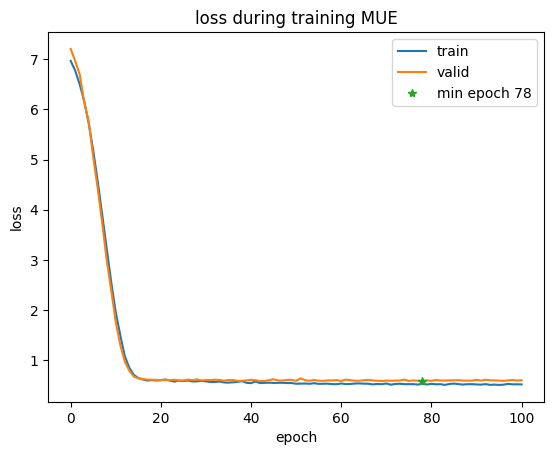

*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.837  &0.500  &0.837  &1.000  &0.000  &0.912 &0.815 &  nan &0.949

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.459  &0.349  &0.590  &0.757

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.681  &1.008  &1.004  &0.810

Epoch:101 [Train] Loss: 0.516 | [Valid] Loss: 0.601	EarlyStopping counter: 23 out of 30
Epoch:102 [Train] Loss: 0.515 | [Valid] Loss: 0.604	EarlyStopping counter: 24 out of 30
Epoch:103 [Train] Loss: 0.520 | [Valid] Loss: 0.604	EarlyStopping counter: 25 out of 30
Epoch:104 [Train] Loss: 0.513 | [Valid] Loss: 0.587	EarlyStopping counter: 26 out of 30
Epoch:105 [Train] Loss: 0.515 | [Valid] Loss: 0.599	EarlyStopping counter: 27 out of 30
Train time: 0.154+/-0.003 ms


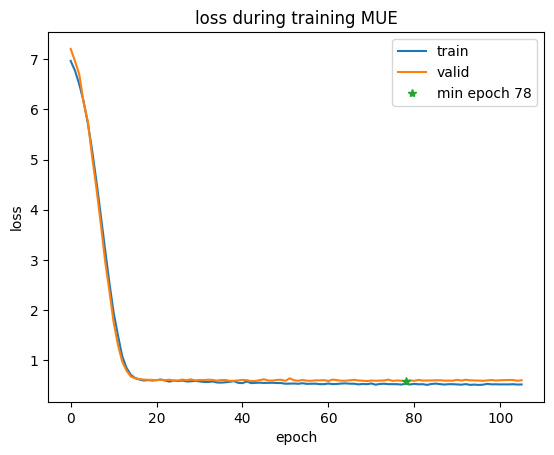

*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.837  &0.500  &0.837  &1.000  &0.000  &0.912 &0.813 &  nan &0.949

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.455  &0.346  &0.588  &0.759

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.682  &1.010  &1.005  &0.810

Epoch:106 [Train] Loss: 0.507 | [Valid] Loss: 0.596	EarlyStopping counter: 28 out of 30
Epoch:107 [Train] Loss: 0.515 | [Valid] Loss: 0.594	EarlyStopping counter: 29 out of 30
Epoch:108 [Train] Loss: 0.507 | [Valid] Loss: 0.587	EarlyStopping counter: 30 out of 30
early stop
Finished training


--> Train status saved at ckpt_MUE.yml
task weight ['0.333', '0.333', '0.333']
Model parameters:  11521
Train time: 0.153+/-0.003 ms
best epoch: 78, min loss: 0.5781


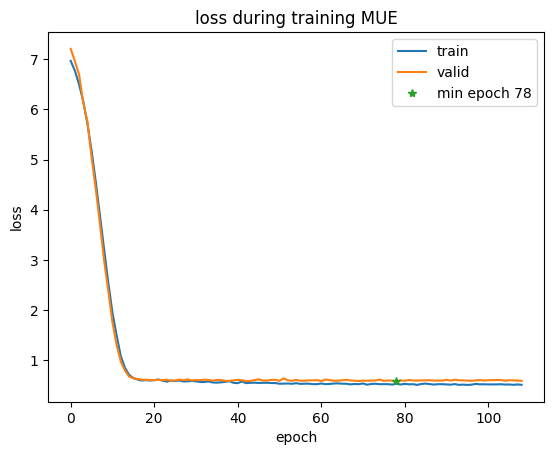

load pretrained model from  ckpt_MUE.pt
[Test] Loss: 0.303
*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.845  &0.500  &0.845  &1.000  &0.000  &0.916 &0.831 &  nan &0.961


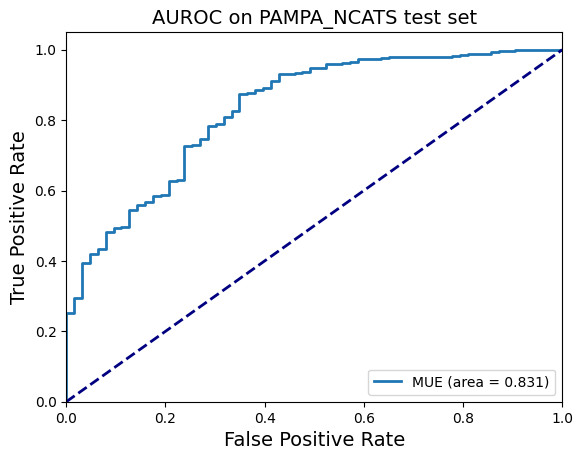

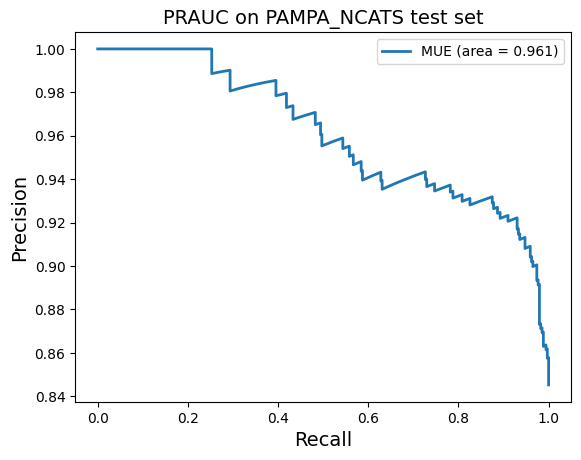


*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.480  &0.418  &0.646  &0.717


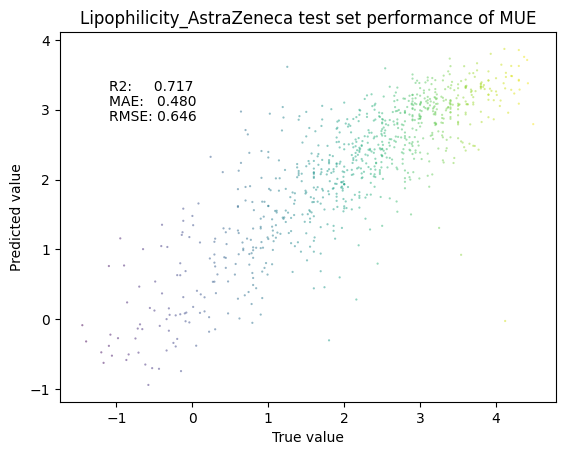


*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.689  &0.952  &0.975  &0.825


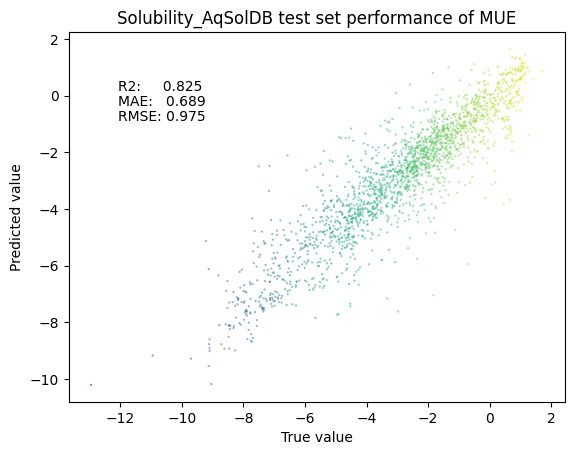



--> Train status saved at ckpt_MUE.yml
Finished evaluate test performance, outputs performance dict


In [28]:
p = models.train(trn_l, val_l, tst_l)

Start training MUE...
Epoch:0 [Train] Loss: 6.135 | [Valid] Loss: 5.644	SAVE MODEL: loss: inf -> 5.644 | runtime: 0.179 ms
Epoch:1 [Train] Loss: 4.599 | [Valid] Loss: 3.825	SAVE MODEL: loss: 5.644 -> 3.825 | runtime: 0.154 ms
Epoch:2 [Train] Loss: 2.601 | [Valid] Loss: 1.741	SAVE MODEL: loss: 3.825 -> 1.741 | runtime: 0.155 ms
Epoch:3 [Train] Loss: 1.039 | [Valid] Loss: 0.752	SAVE MODEL: loss: 1.741 -> 0.752 | runtime: 0.156 ms
Epoch:4 [Train] Loss: 0.626 | [Valid] Loss: 0.643	SAVE MODEL: loss: 0.752 -> 0.643 | runtime: 0.156 ms
Epoch:5 [Train] Loss: 0.575 | [Valid] Loss: 0.615	SAVE MODEL: loss: 0.643 -> 0.615 | runtime: 0.165 ms
Epoch:6 [Train] Loss: 0.576 | [Valid] Loss: 0.628	EarlyStopping counter: 1 out of 30
Epoch:7 [Train] Loss: 0.564 | [Valid] Loss: 0.602	SAVE MODEL: loss: 0.615 -> 0.602 | runtime: 0.153 ms
Epoch:8 [Train] Loss: 0.562 | [Valid] Loss: 0.607	EarlyStopping counter: 1 out of 30
Epoch:9 [Train] Loss: 0.557 | [Valid] Loss: 0.655	EarlyStopping counter: 2 out of 30
Epoc

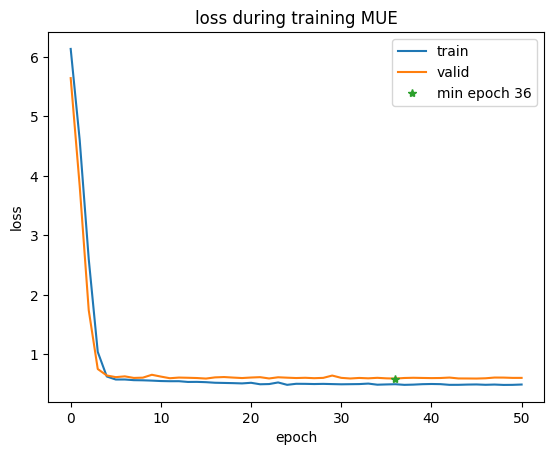

*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.837  &0.500  &0.837  &1.000  &0.000  &0.912 &0.814 &  nan &0.950

*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.480  &0.378  &0.615  &0.737

*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.686  &1.018  &1.009  &0.808

Epoch:51 [Train] Loss: 0.481 | [Valid] Loss: 0.610	EarlyStopping counter: 15 out of 30
Epoch:52 [Train] Loss: 0.484 | [Valid] Loss: 0.634	EarlyStopping counter: 16 out of 30
Epoch:53 [Train] Loss: 0.486 | [Valid] Loss: 0.601	EarlyStopping counter: 17 out of 30
Epoch:54 [Train] Loss: 0.475 | [Valid] Loss: 0.600	EarlyStopping counter: 18 out of 30
Epoch:55 [Train] Loss: 0.484 | [Valid] Loss: 0.624	EarlyStopping counter: 19 out of 30
Epoch:56 [Train] Loss: 0.487 | [Valid] Loss: 0.603	EarlyStopping counter: 20 out of 30
Epoch:57 [Train] Loss: 0.484 | [Valid] Loss: 0.604	EarlyStopping cou

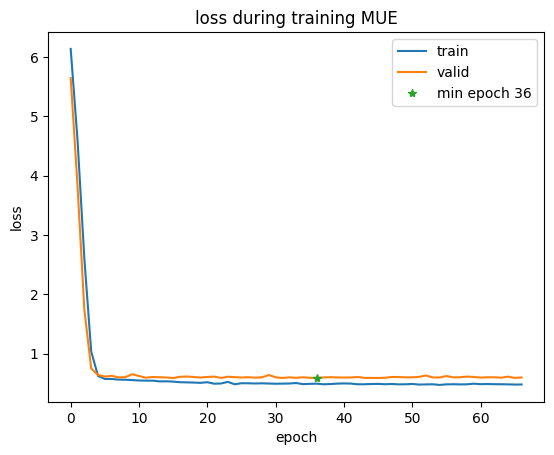

load pretrained model from  ckpt_MUE.pt
[Test] Loss: 0.310
*************** PAMPA_NCATS ***************
  Acc,  w_acc,   prec,  recall,   SP,     F1,    AUC,   MCC,   AP
&0.845  &0.500  &0.845  &1.000  &0.000  &0.916 &0.829 &  nan &0.961


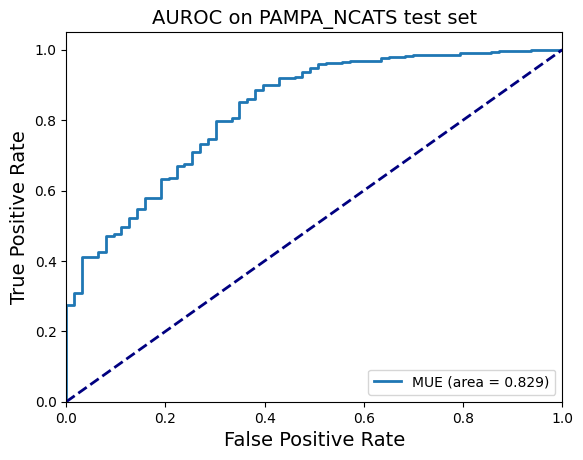

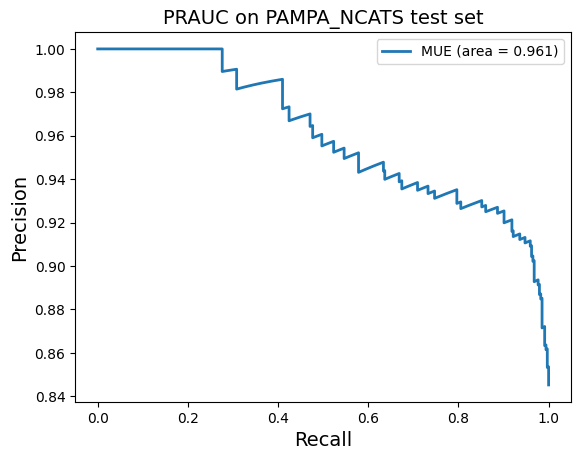


*************** Lipophilicity_AstraZeneca ***************
  MAE     MSE     RMSE    R2
&0.501  &0.450  &0.671  &0.695


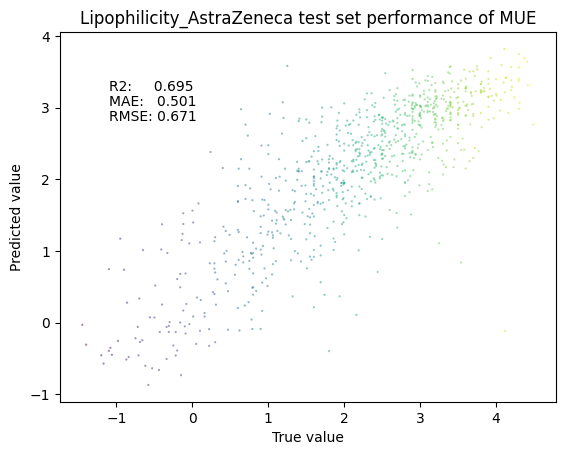


*************** Solubility_AqSolDB ***************
  MAE     MSE     RMSE    R2
&0.691  &0.956  &0.978  &0.824


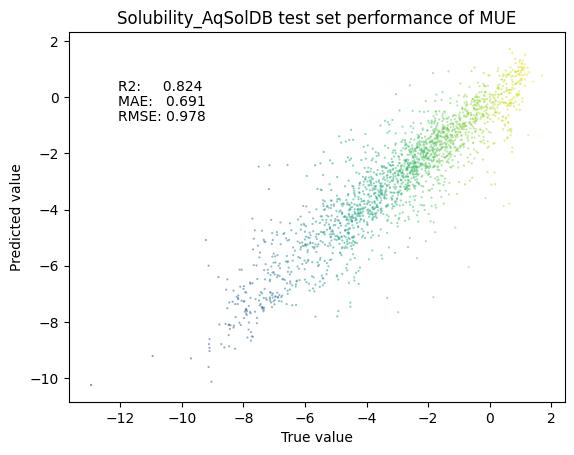



--> Train status saved at ckpt_MUE.yml
Finished evaluate test performance, outputs performance dict


In [10]:
p = models.train(trn_l, val_l, tst_l)

In [16]:
# config_MUE = {'model_type': 'MUE',
#             'in_dim': len(['MLP', 'AttentiveFP', 'GIN', 'RNN']), # ensemble of 4 models
#             'out_dim': 1,
#             'hid_dims': MLP_hid_dims,
#             'dropout': 0.1,
#             'prop_names': names,
#             'IS_R': IS_R,
#             'batch_size': batch_size,
#             'lr': 3e-5,
#             'wd': wd,
#             'patience': 30,
#             'verbose_freq': 50,
#             'model_path': f'ckpt_MUE.pt',
#             # 'weight_loss': [1.0],
#             # 'uncertainty_weight': False,
#             'scale_dict': None}

import torch.nn.functional as F
class EnsembleMLP(nn.Module):
    def __init__(self, **config):
        super(EnsembleMLP, self).__init__()
        neurons = [config['in_dim']*len(config['prop_names']),
                   *config['hid_dims']]
        linear_layers = [nn.Linear(neurons[i-1], neurons[i]) \
                         for i in range(1, len(neurons))]
        self.hidden = nn.ModuleList(linear_layers)
        self.final = nn.Linear(config['hid_dims'][-1], config['out_dim']*len(config['prop_names']))
        self.dropout = nn.Dropout(config['dropout'])
        self.model_type = config['model_type']

    def forward(self, x):
        # could use len of x shape to deterine change classifier
        batch_size, num_tasks, num_models = x.shape
        x = x.view(batch_size, -1)
        # x = x.view(-1, num_models) # (batch_size * num_tasks, num_models)
        ###

        for layer in self.hidden: x = F.relu(layer(x))
        x = self.final(self.dropout(x))

        ## if len(x.shape) == 3:
        # x = x.view(batch_size, num_tasks)
        return x





In [20]:
m = EnsembleMLP(**config).to('cuda')
o = torch.optim.AdamW(m.parameters(), lr=1e-4, weight_decay=1e-5)
names = names_A3
IS_R = [names_dict[name] for name in names]
for i in range(100):
    train_epoch_MLP(m, trn_l, IS_R, names_A3, 'cuda', optimizer=o, epoch=0, )

(5.247208107601512,
 [122.9406606554985, 954.390832066536, 1693.1942896842957],
 [False, True, True])

In [82]:
m(i).shape

torch.Size([64, 3])

In [84]:
class Classifier(nn.Module):
    def __init__(self, **config):
        super(Classifier, self).__init__()
        dims = [config['in_dim'], config['hid_dims'], config['out_dim']]
        self.dims = dims
        neurons = [config['in_dim'], *config['hid_dims']]
        linear_layers = [nn.Linear(neurons[i-1], neurons[i]) \
                         for i in range(1, len(neurons))]
        self.hidden = nn.ModuleList(linear_layers)
        self.final = nn.Linear(config['hid_dims'][-1], config['out_dim'])
        self.dropout = nn.Dropout(config['dropout'])
        self.model_type = config['model_type']

    def forward(self, x):
        # for MUE:
        ensemble_here = False
        if len(x.shape) == 3:
            ensemble_here = True
            batch_size, num_tasks, num_models = x.shape
            x = x.view(-1, num_models)
        for layer in self.hidden: x = F.relu(layer(x))
        x = self.dropout(x)
        x = self.final(x)
        if ensemble_here == True: x = x.view(batch_size, num_tasks)
        return x

Model type:  MUE | Model parameters:  2945


In [88]:
IS_R

[False, True, True]

In [92]:
m = Classifier(**config).to('cuda')
o = torch.optim.AdamW(m.parameters(), lr=1e-4, weight_decay=1e-5)
train_epoch_MLP(m, trn_l, IS_R, names_A3, 'cuda', optimizer=o, epoch=0)

(5.517377585172653,
 [113.09971761703491, 871.5058126449585, 1928.5697491168976],
 [False, True, True])

In [38]:
def clamp(number, min_value=1e-5, max_value=1-1e-5):
    return max(min_value, min(number, max_value))

0.99999

In [42]:
weight_loss = [0, 1, 0]
for n in range(len(weight_loss)):
    weight_loss[n] = clamp(weight_loss[n])

weight_loss = [i/sum(weight_loss) for i in weight_loss]

In [43]:
weight_loss

[9.99990000099999e-06, 0.999980000199998, 9.99990000099999e-06]